In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


* work_year: The year the salary was paid.

* experience_level: The experience level in the job during the year (SE: Senior, EN: Entry level, EX: Executive level, MI: Mid/Intermediate level )

* employment_type: The type of employment for the role (FT:'Full-Time', PT:'Part-Time', CT:'Contract', FL:'Freelance')

* job_title: The role worked in during the year.

* salary: The total gross salary amount paid.

* salary_currency: The currency of the salary paid as an ISO 4217 currency code.

* salaryinusd: The salary in USD

* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

* remote_ratio: The overall amount of work done remotely (0 : No remote work, 50 : Partially remote, 100 : Fully remote)

* company_location: The country of the employer's main office or contracting branch

* company_size: The median number of people that worked for the company during the year

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [34]:
# let's look at the unique values in the df columns.
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
work_year,4
experience_level,4
employment_type,4
job_title,93
salary,815
salary_currency,20
salary_in_usd,1035
employee_residence,78
remote_ratio,3
company_location,72


In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [10]:
# experience_level sütununu daha okunaklı hale getirelim
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level')

In [11]:
# employment_type sütununu daha okunaklı hale getirelim
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Categorical Feature Analysis

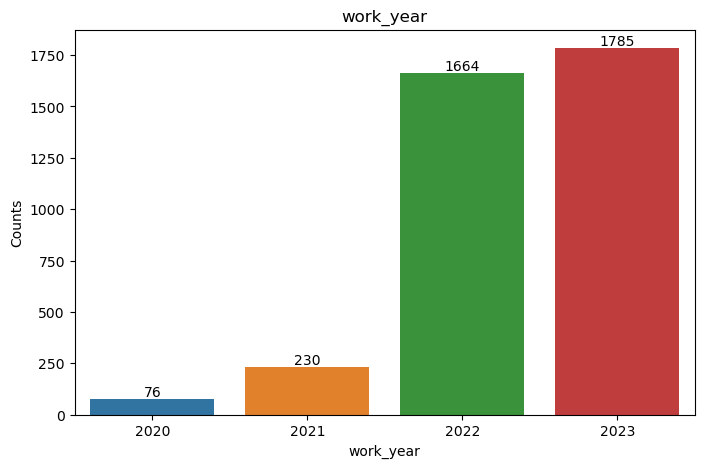

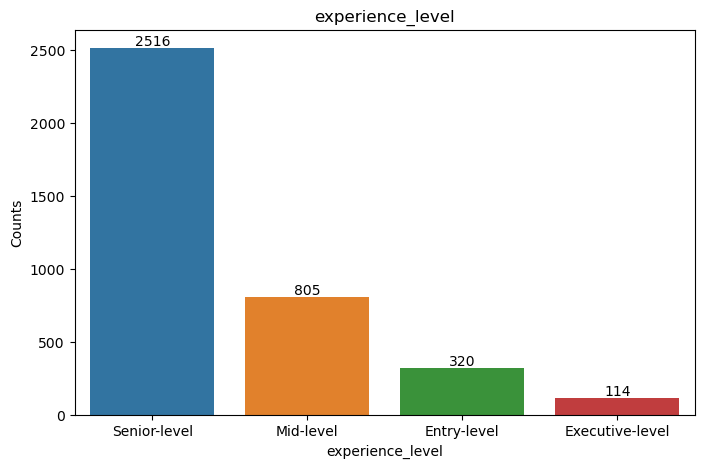

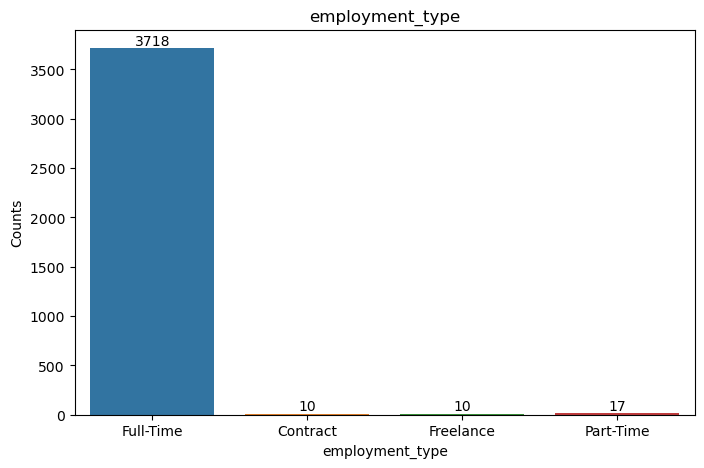

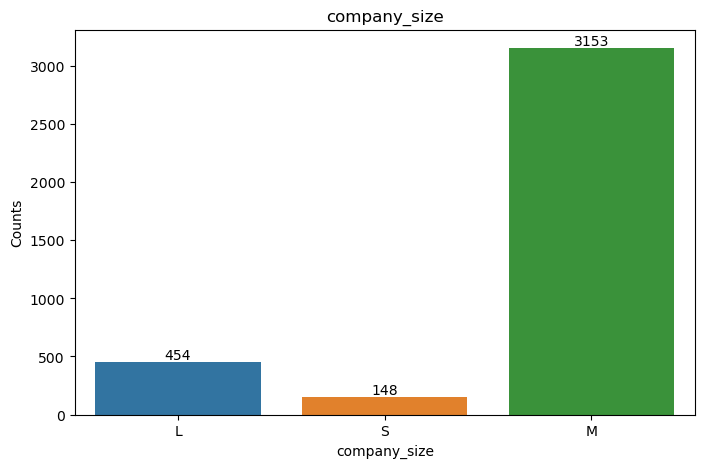

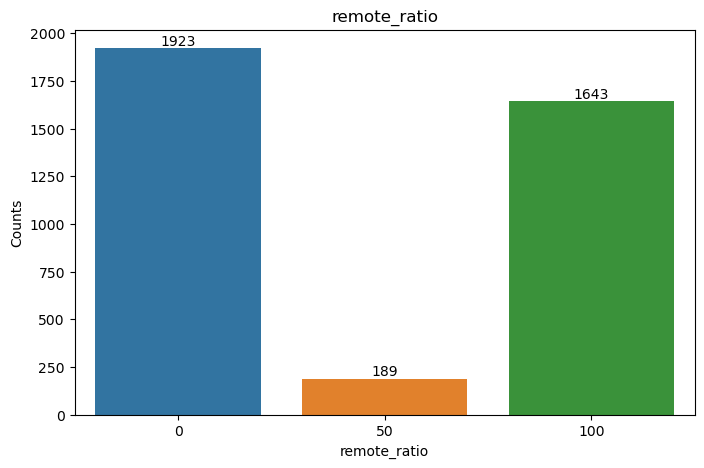

In [13]:
for i in ['work_year', 'experience_level', 'employment_type','company_size','remote_ratio']:
    fig, ax = plt.subplots(figsize = (8,5))
    sns.countplot(ax = ax, data = df, x = df[i])
    ax.set(ylabel='Counts', title=i)
    
    ax.bar_label(ax.containers[0])

## Top 10 Jobs by Year Status

In [70]:
# unique meslek sayısı
df['job_title'].nunique()

93

In [40]:
df['job_title'].value_counts().nlargest(10)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

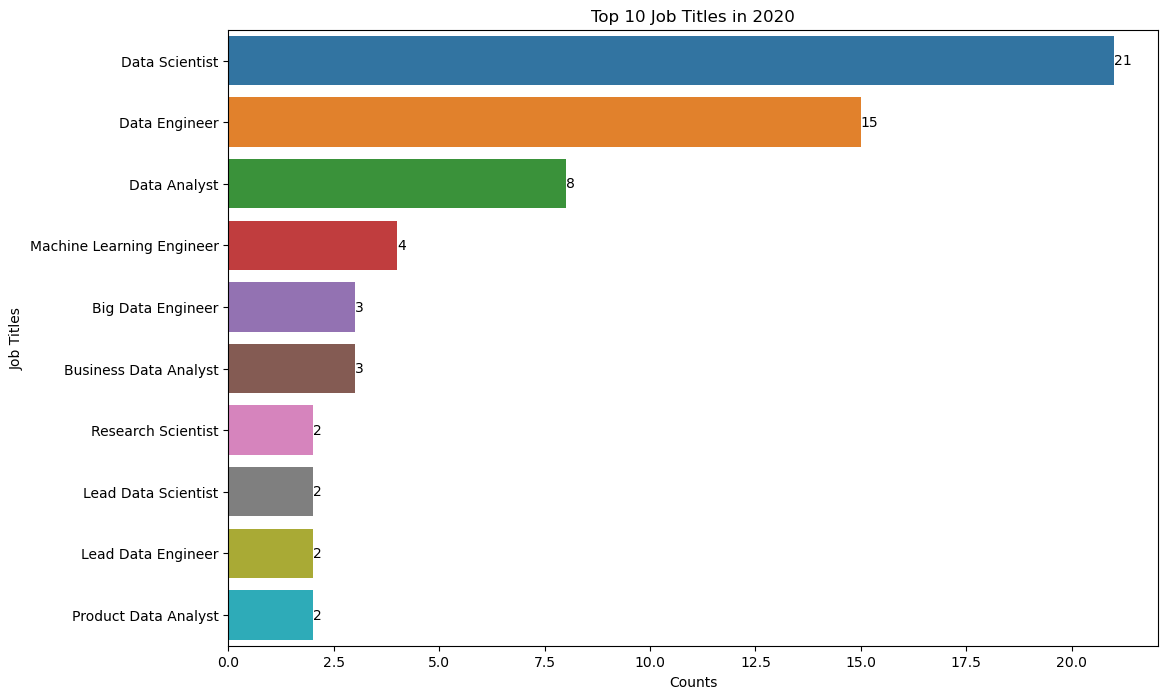

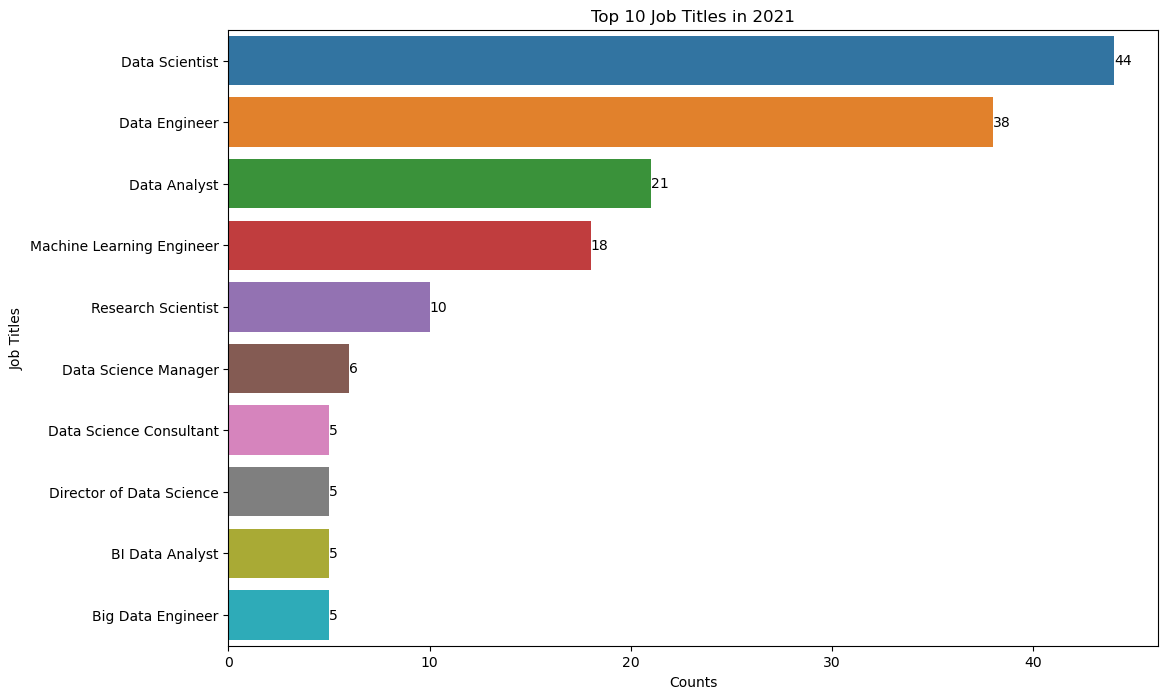

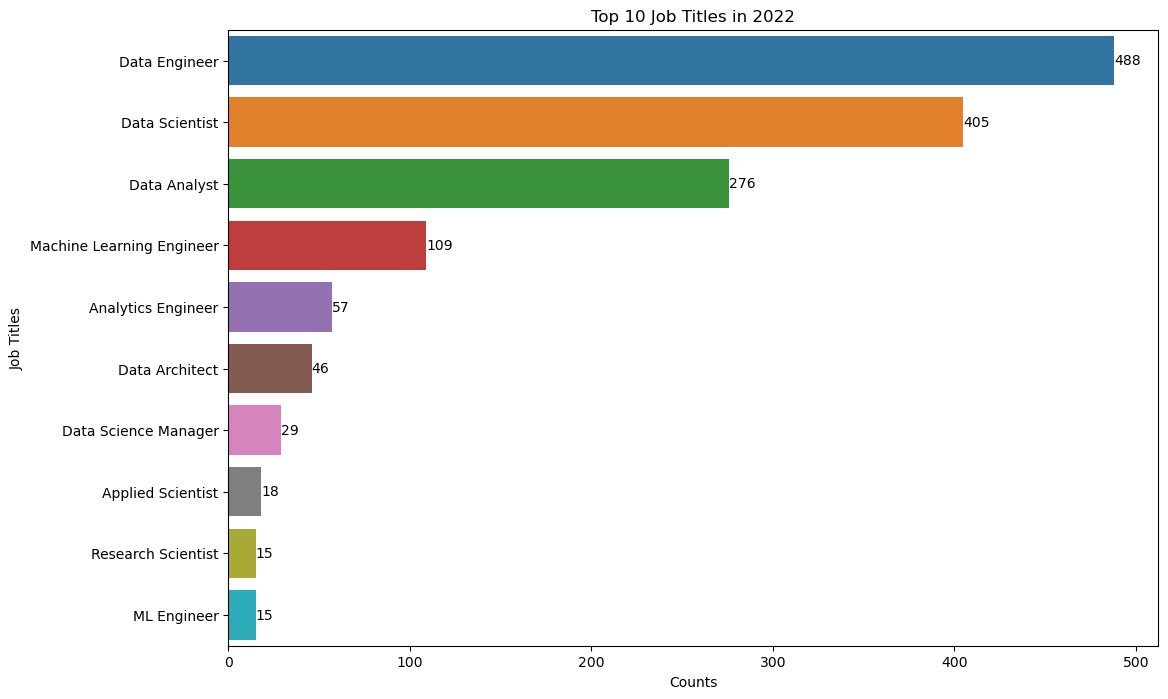

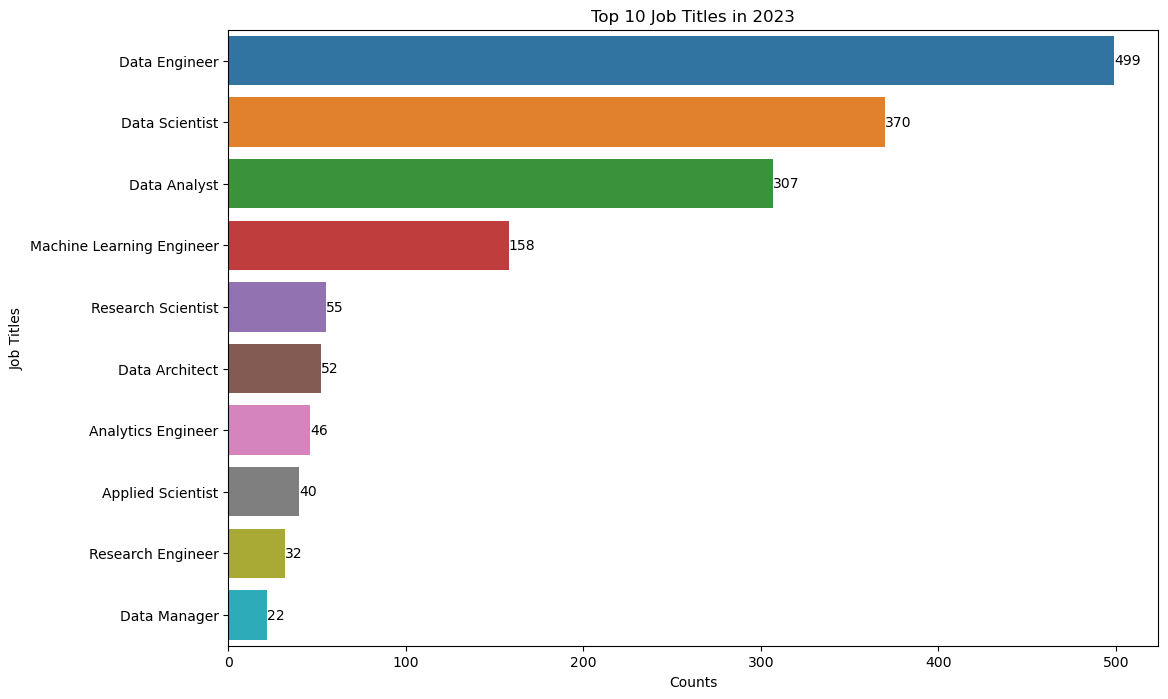

In [39]:
# Yıllara göre top 10 meslek sayısı
for i in [2020,2021,2022,2023]:  
    plt.figure(figsize = (12,8))
    ax = sns.barplot(y = df[df['work_year']==i]['job_title'].value_counts().nlargest(10).index, 
                     x = df[df['work_year']==i]['job_title'].value_counts().nlargest(10))
    ax.set(ylabel='Job Titles',xlabel='Counts', title=f'Top 10 Job Titles in {i}')
    ax.bar_label(ax.containers[0])
    plt.show()

## Number of Employment Types by Level of Experience

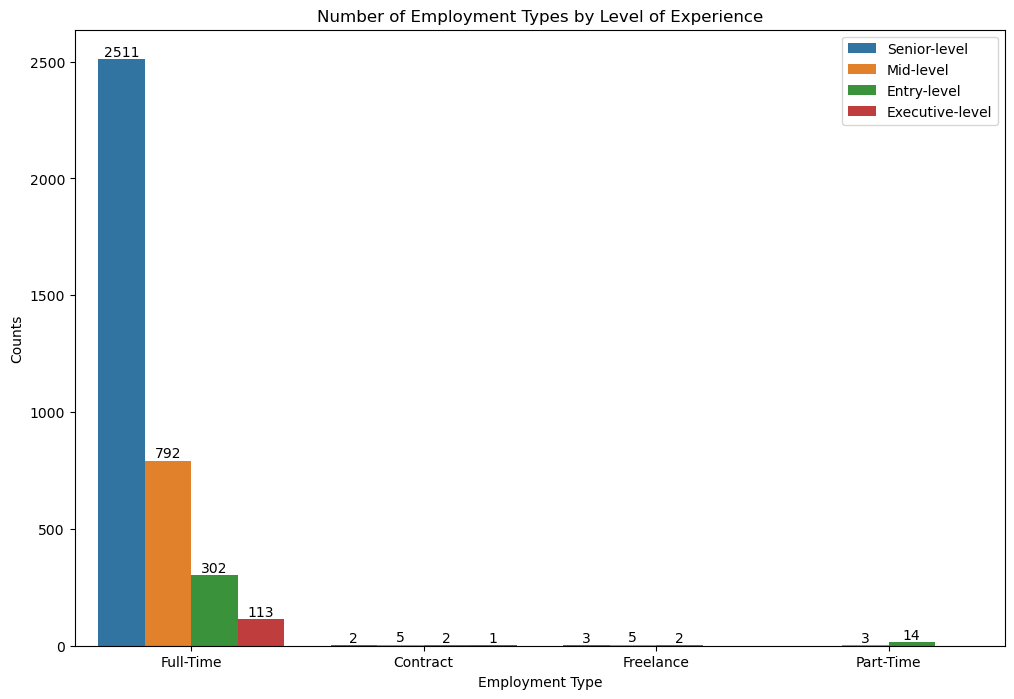

In [72]:
plt.figure(figsize = (12,8))
ax = sns.countplot(data = df, x = "employment_type", hue = 'experience_level')
ax.set(xlabel='Employment Type', ylabel='Counts', title='Number of Employment Types by Level of Experience')
plt.legend(loc = 1)
for j in [0,1,2,3]:
    ax.bar_label(ax.containers[j])
plt.show()

Gördüğünüz gibi, burada önemli sayıda kişi tam zamanlı olarak istihdam edilmektedir. Tam zamanlı çalışanlar arasında kıdemli olanlar çoğunluktadır. Serbest çalışmanın bugünlerde daha az yaygın olduğunu gözlemliyoruz

## Average Salary by Company Size

In [25]:
company_size_salary = df.groupby('company_size')['salary'].mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
company_size_salary

,company_size,salary
0,L,438794.0
1,S,281430.0
2,M,150713.0


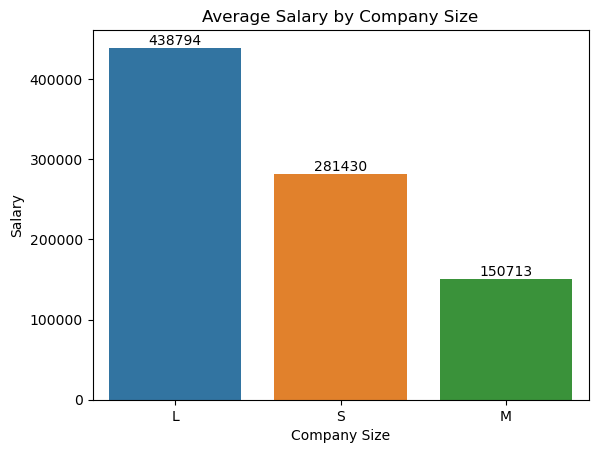

In [32]:
ax= sns.barplot(data = company_size_salary , x = "company_size", y = "salary")
ax.set(ylabel='Salary',xlabel='Company Size', title='Average Salary by Company Size')
ax.bar_label(ax.containers[0])
plt.show()


In [73]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,US,100,US,S


## Average Salary by Remote Ratio

In [74]:
remote_ratio_salary = df.groupby('remote_ratio')['salary'].mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
remote_ratio_salary

,remote_ratio,salary
0,50,557068.0
1,100,191047.0
2,0,154387.0


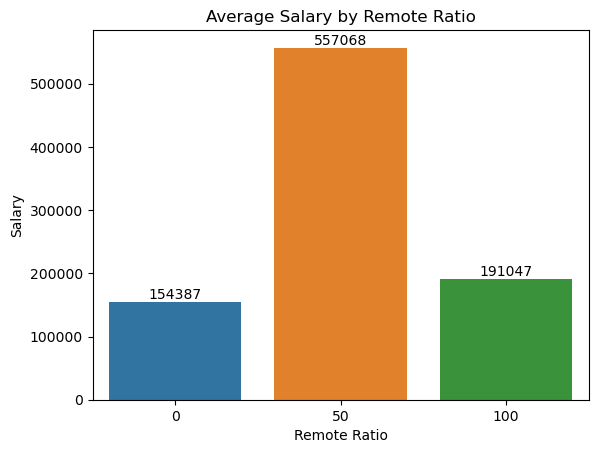

In [76]:
ax= sns.barplot(data = remote_ratio_salary , x = "remote_ratio", y = "salary")
ax.set(ylabel='Salary',xlabel='Remote Ratio', title='Average Salary by Remote Ratio')
ax.bar_label(ax.containers[0])
plt.show()

## Average Salary by Employment Type

In [78]:
employment_type_salary = df.groupby('employment_type')['salary'].mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
employment_type_salary

,employment_type,salary
0,Freelance,288756.0
1,Full-Time,191147.0
2,Contract,113300.0
3,Part-Time,79911.0


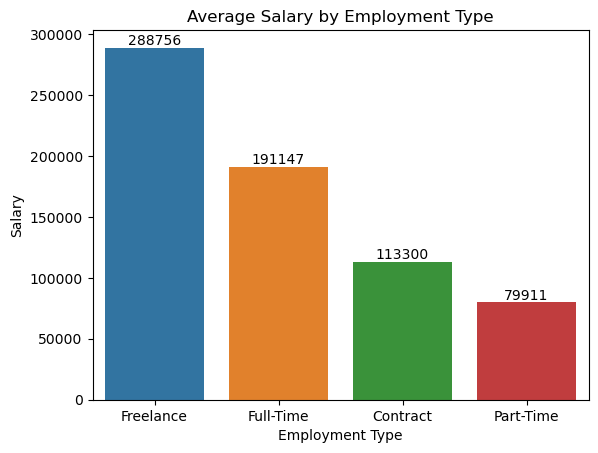

In [79]:
ax= sns.barplot(data = employment_type_salary , x = "employment_type", y = "salary")
ax.set(ylabel='Salary',xlabel='Employment Type', title='Average Salary by Employment Type')
ax.bar_label(ax.containers[0])
plt.show()

## Average Salary by Experience Level

In [80]:
experience_level_salary = df.groupby('experience_level')['salary'].mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
experience_level_salary

,experience_level,salary
0,Mid-level,248200.0
1,Executive-level,246802.0
2,Entry-level,188381.0
3,Senior-level,170049.0


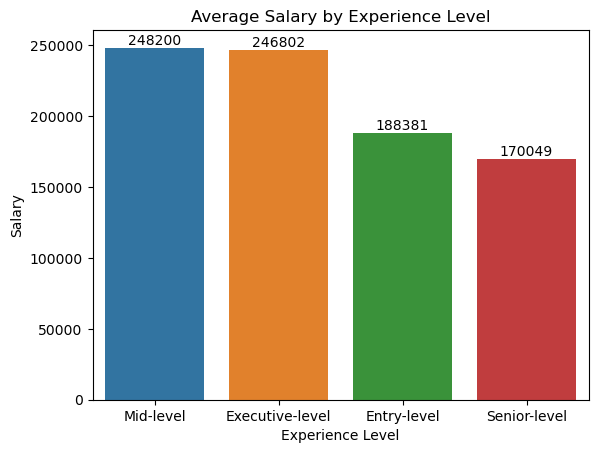

In [81]:
ax= sns.barplot(data = experience_level_salary , x = "experience_level", y = "salary")
ax.set(ylabel='Salary',xlabel='Experience Level', title='Average Salary by Experience Level')
ax.bar_label(ax.containers[0])
plt.show()

## Top 15 Average Salaries by Job Titles

In [26]:
job_title_salary = df.groupby('job_title')['salary_in_usd'].mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
job_title_salary

,job_title,salary_in_usd
0,Data Science Tech Lead,375000.0
1,Cloud Data Architect,250000.0
2,Data Lead,212500.0
3,Data Analytics Lead,211254.0
4,Principal Data Scientist,198171.0
5,Director of Data Science,195141.0
6,Principal Data Engineer,192500.0
7,Machine Learning Software Engineer,192420.0
8,Data Science Manager,191279.0
9,Applied Scientist,190264.0


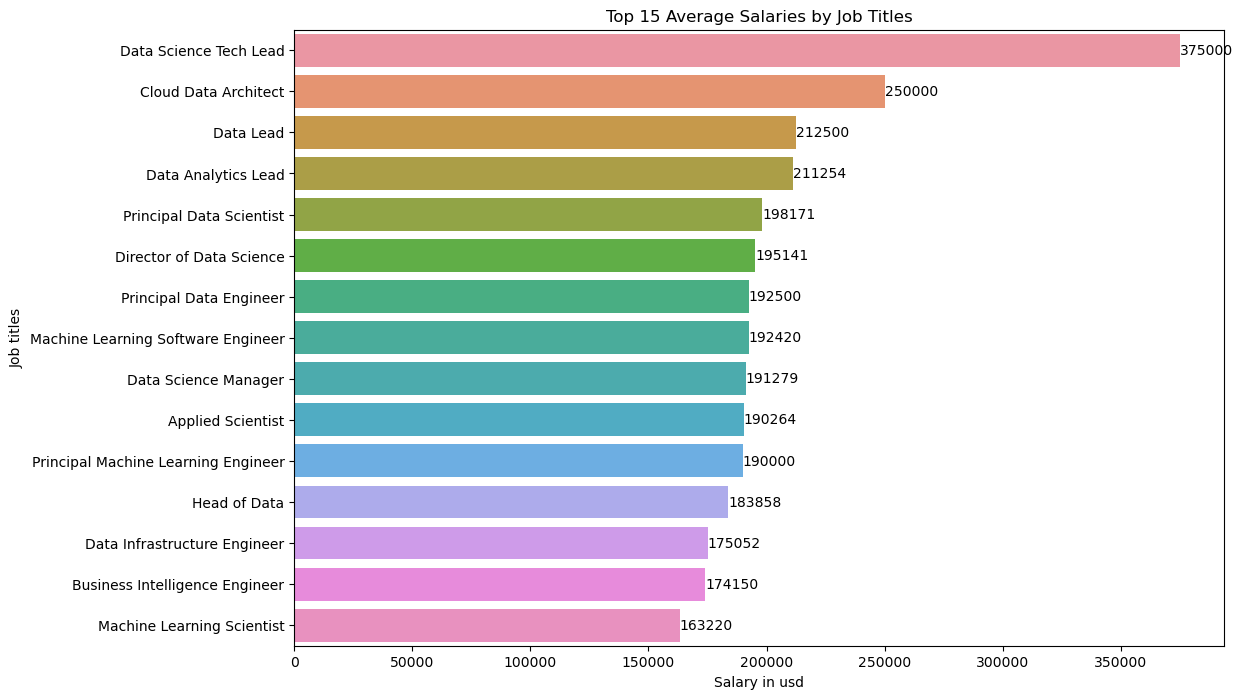

In [30]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = job_title_salary , y = job_title_salary.job_title, x = job_title_salary.salary_in_usd)
ax.set(ylabel='Job titles',xlabel='Salary in usd', title='Top 15 Average Salaries by Job Titles')
ax.bar_label(ax.containers[0])
plt.show()

Beklediğimiz gibi, genellikle yönetici düzeyinde istihdam edilenlerin ortalama maaşları daha yüksektir. Bulut bilişim trendine bağlı olarak, bulut veri mimarı en yüksek maaş alan ikinci meslektir.

## Average Salaries in Dollars Per Year by Type of Employment

In [19]:
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
avg_salaries

,employment_type,salary_in_usd
0,Full-Time,138314.0
1,Contract,113447.0
2,Freelance,51808.0
3,Part-Time,39534.0


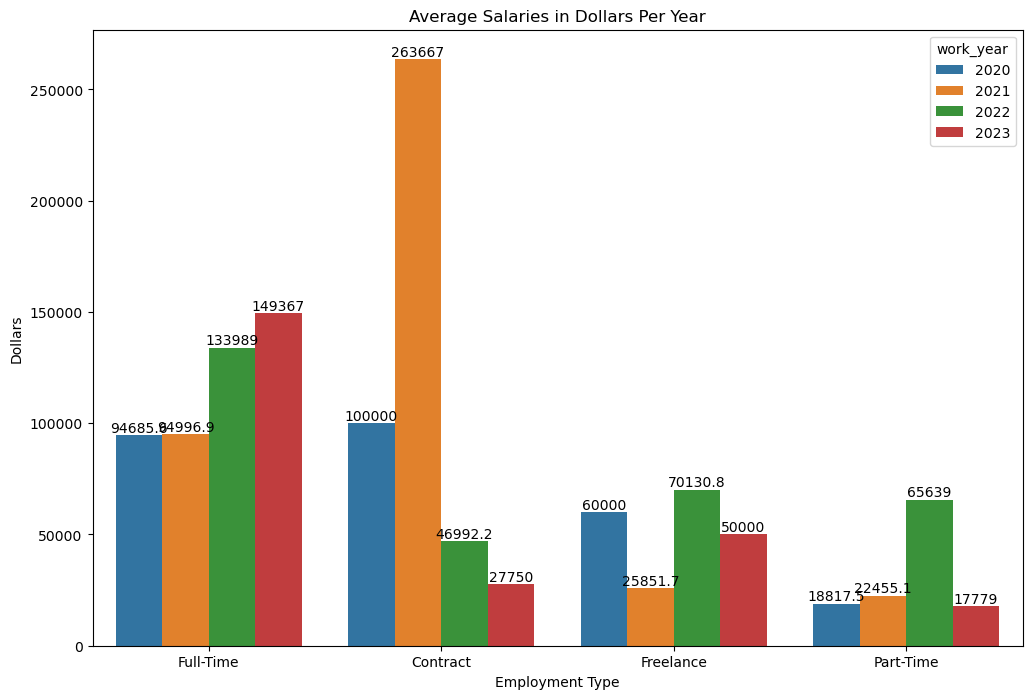

In [71]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df , x = 'employment_type', y = 'salary_in_usd', hue = 'work_year',ci=None)
ax.set(xlabel='Employment Type', ylabel='Dollars', title='Average Salaries in Dollars Per Year')

for j in [0,1,2,3]:
    ax.bar_label(ax.containers[j])

plt.show()

## Average Salaries in Dollars Per Year

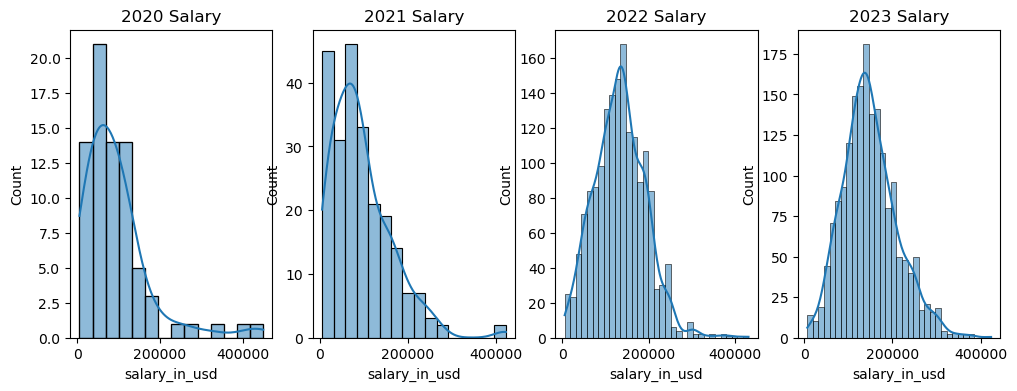

In [69]:
plt.figure(figsize = (12,4))
plt.subplot(141)
sns.histplot(data = df, x = df[df["work_year"] == 2020]["salary_in_usd"], kde = True)
plt.title("2020 Salary")
plt.subplot(142)
sns.histplot(data = df, x = df[df["work_year"] == 2021]["salary_in_usd"], kde = True)
plt.title("2021 Salary")
plt.subplot(143)
sns.histplot(data = df, x = df[df["work_year"] == 2022]["salary_in_usd"], kde = True)
plt.title("2022 Salary")
plt.subplot(144)
sns.histplot(data = df, x = df[df["work_year"] == 2023]["salary_in_usd"], kde = True)
plt.title("2023 Salary")

plt.show()

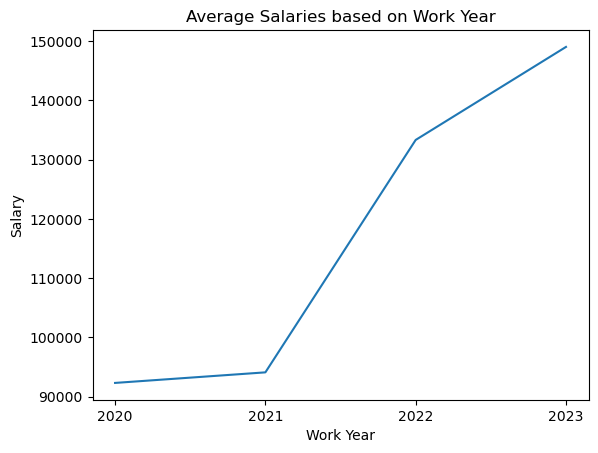

In [21]:
year_based_salary=df.groupby('work_year')['salary_in_usd'].mean()

sns.lineplot(x=['2020', '2021', '2022','2023'], y=year_based_salary)
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.show()

Gördüğünüz gibi, veri odaklı işler için ortalama maaş her yıl artıyor ve özellikle 2021 ile 2022 yılları arasında önemli bir sıçrama gözlemleniyor. Bu eğilim, bu alanda yetenekli profesyonellere yönelik artan talebin altını çiziyor